<a href="https://colab.research.google.com/github/SuryaTeja-aiml/2024-StatMLAssignments/blob/main/2303A52007_StatMLAssignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Question 1
Below is an example dataset with 10 students (rows), 5 features, and a binary target label (Pass/Fail). The target label is 1 if the student is predicted to pass, and 0 if they are predicted to fail.

In [323]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, auc, precision_recall_curve
data = {
    'X1': [10, 5, 15, 2, 12, 8, 14, 3, 11, 6],
    'X2': [90, 60, 95, 30, 85, 75, 92, 50, 88, 65],
    'X3': [85, 70, 90, 50, 88, 65, 93, 55, 80, 60],
    'X4': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    'X5': [100, 80, 100, 40, 90, 70, 95, 60, 85, 75],
    'Pass/Fail': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
}
df = pd.DataFrame(data)
print(df.head())

   X1  X2  X3  X4   X5  Pass/Fail
0  10  90  85   1  100          1
1   5  60  70   0   80          0
2  15  95  90   1  100          1
3   2  30  50   0   40          0
4  12  85  88   1   90          1


In [324]:
#features and target variables
X = df.drop('Pass/Fail', axis=1)
y = df['Pass/Fail']
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [325]:
#scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [326]:
#logistic regression
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [327]:
#accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [328]:
#classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nModel Coefficients:")
for feature, coef in zip(["X1", "X2", "X3", "X4", "X5"], model.coef_[0]):
    print(f"{feature}: {coef:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


Model Coefficients:
X1: 0.4687
X2: 0.3926
X3: 0.6102
X4: 0.7466
X5: 0.4907


In [329]:
#testing
new_student_df = pd.DataFrame({
    'X1': [10],
    'X2': [85],
    'X3': [80],
    'X4': [1],
    'X5': [90]
})

new_student_scaled = scaler.transform(new_student_df)
prediction = model.predict(new_student_scaled)
probability = model.predict_proba(new_student_scaled)[0][1]
print(f"\nPrediction for new student: {'Pass' if prediction[0] == 1 else 'Fail'}")
print(f"Probability of passing: {probability:.2f}")


Prediction for new student: Pass
Probability of passing: 0.81


In [330]:
#sigmoid
def sigmoid(z):
  return 1 / (1 + np.exp(-z))
z = np.dot(new_student_scaled, model.coef_.T) + model.intercept_
sigmoid_value = sigmoid(z)
print(f"Probability of passing (from sigmoid function): {sigmoid_value[0][0]:.2f}")

Probability of passing (from sigmoid function): 0.81


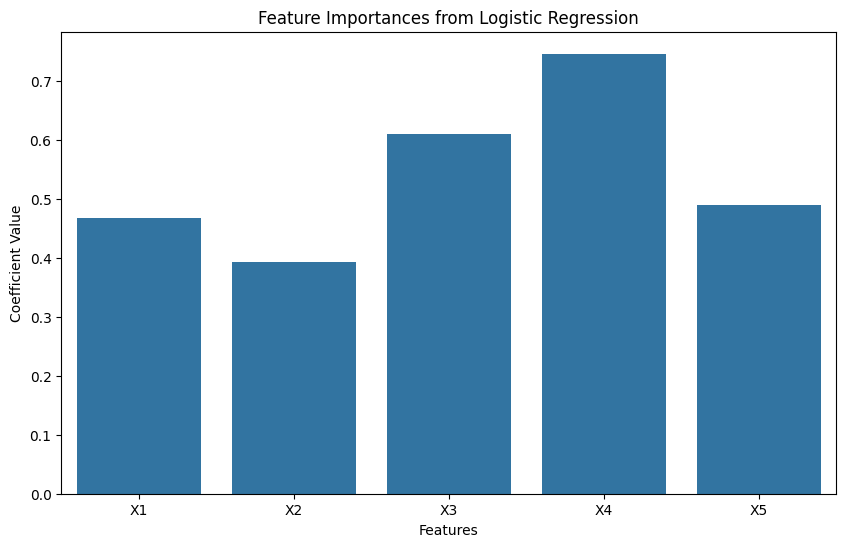

In [331]:
coefficients = model.coef_[0]
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importances from Logistic Regression')
plt.show()

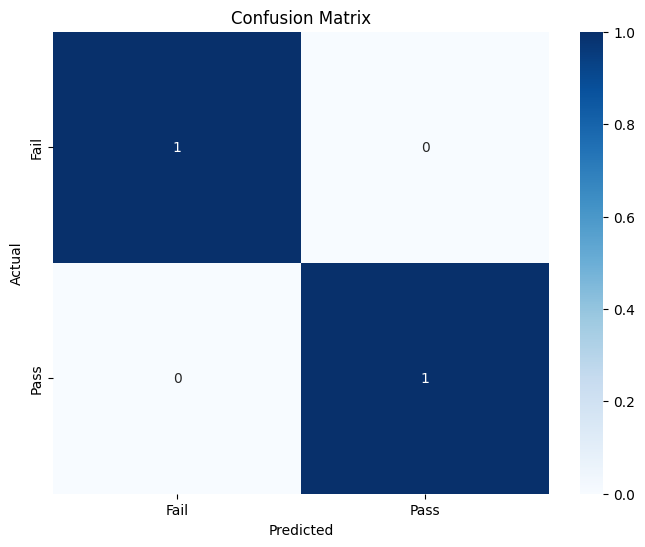

In [332]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

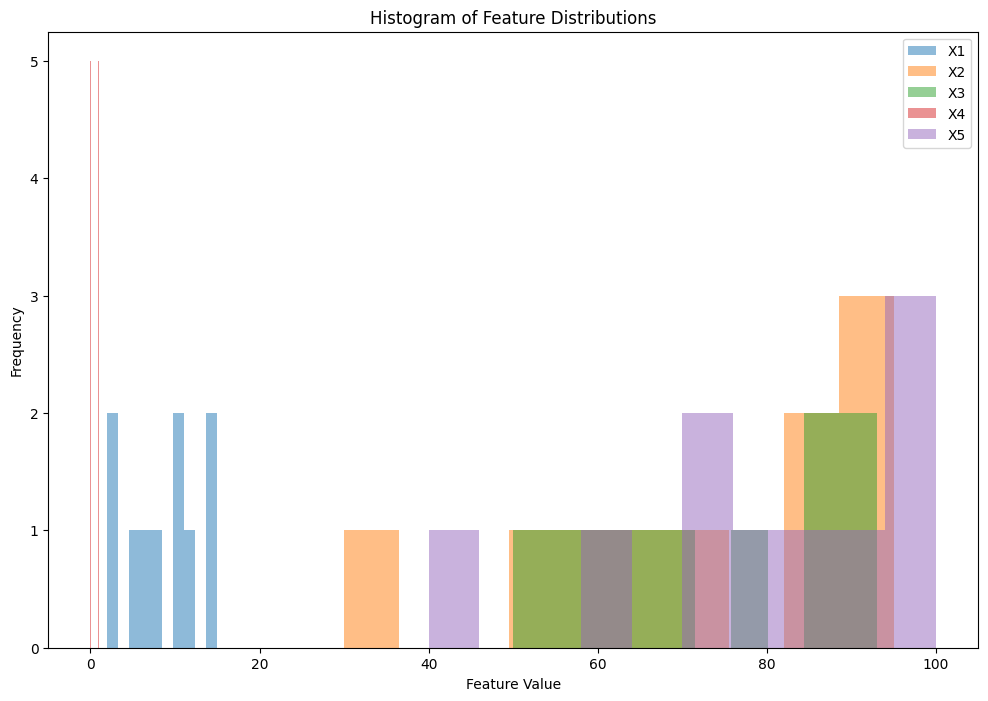

In [333]:
# Histogram of Feature Distributions
plt.figure(figsize=(12, 8))
for feature in df.columns[:-1]:
    plt.hist(df[feature], bins=10, alpha=0.5, label=feature)
plt.title('Histogram of Feature Distributions')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

##Questions 2:

https://www.kaggle.com/datasets/ishandutta/early-stage-diabetes-risk-prediction-datasetLinks

Implement a logistic regression model to train above data, and find the accuracy.

In [334]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, auc, precision_recall_curve
data = pd.read_csv('diabetes_data_upload.csv')
df = pd.DataFrame(data)
print(df.head())

   Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity     class  
0              No              Yes      

In [335]:
# Replace categorical values with 1 and 0
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['class'] = data['class'].map({'Positive': 1, 'Negative': 0})
data['Polyuria'] = data['Polyuria'].map({'Yes': 1, 'No': 0})
data['Polydipsia'] = data['Polydipsia'].map({'Yes': 1, 'No': 0})
data['sudden weight loss'] = data['sudden weight loss'].map({'Yes': 1, 'No': 0})
data['weakness'] = data['weakness'].map({'Yes': 1, 'No': 0})
data['Polyphagia'] = data['Polyphagia'].map({'Yes': 1, 'No': 0})
data['Genital thrush'] = data['Genital thrush'].map({'Yes': 1, 'No': 0})
data['visual blurring'] = data['visual blurring'].map({'Yes': 1, 'No': 0})
data['Itching'] = data['Itching'].map({'Yes': 1, 'No': 0})
data['Irritability'] = data['Irritability'].map({'Yes': 1, 'No': 0})
data['delayed healing'] = data['delayed healing'].map({'Yes': 1, 'No': 0})
data['partial paresis'] = data['partial paresis'].map({'Yes': 1, 'No': 0})
data['muscle stiffness'] = data['muscle stiffness'].map({'Yes': 1, 'No': 0})
data['Alopecia'] = data['Alopecia'].map({'Yes': 1, 'No': 0})
data['Obesity'] = data['Obesity'].map({'Yes': 1, 'No': 0})

In [336]:
#features and target variables
X = data.drop('class', axis=1) # Use data instead of df
y = data['class'] # Use data instead of df

In [337]:
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [338]:
#accuracy
# Create and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Generate predictions using the trained model
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.92


In [339]:
#classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Print Model Coefficients
print("\nModel Coefficients:")
feature_names = X.columns
for feature, coef in zip(feature_names, model.coef_[0]):
    print(f"{feature}: {coef:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104


Model Coefficients:
Age: -0.5500
Gender: -1.5156
Polyuria: 1.6573
Polydipsia: 1.7750
sudden weight loss: 0.4233
weakness: 0.3381
Polyphagia: 0.2582
Genital thrush: 0.7816
visual blurring: 0.5502
Itching: -0.9449
Irritability: 0.8405
delayed healing: -0.3594
partial paresis: 0.5707
muscle stiffness: -0.1339
Alopecia: -0.0203
Obesity: -0.1225


In [340]:
new_patient_df = pd.DataFrame({
    'Age': [45],
    'Gender': [1],
    'Polyuria': [0],
    'Polydipsia': [1],
    'sudden weight loss': [0],
    'weakness': [1],
    'Polyphagia': [0],
    'Genital thrush': [1],
    'visual blurring': [0],
    'Itching': [1],
    'Irritability': [0],
    'delayed healing': [1],
    'partial paresis': [0],
    'muscle stiffness': [0],
    'Alopecia': [1],
    'Obesity': [1]
})

new_patient_scaled = scaler.transform(new_patient_df)
prediction = model.predict(new_patient_scaled)
probability = model.predict_proba(new_patient_scaled)[0][1]

print(f"\nPrediction for new patient: {'Diabetic' if prediction[0] == 1 else 'Non-diabetic'}")
print(f"Probability of being diabetic: {probability:.2f}")



Prediction for new patient: Non-diabetic
Probability of being diabetic: 0.45


In [341]:
#sigmoid
def sigmoid(z):
  return 1 / (1 + np.exp(-z))
z = np.dot(new_patient_scaled, model.coef_.T) + model.intercept_
sigmoid_value = sigmoid(z)
print(f"Probability for class (from sigmoid function): {sigmoid_value[0][0]:.2f}")

Probability for class (from sigmoid function): 0.45


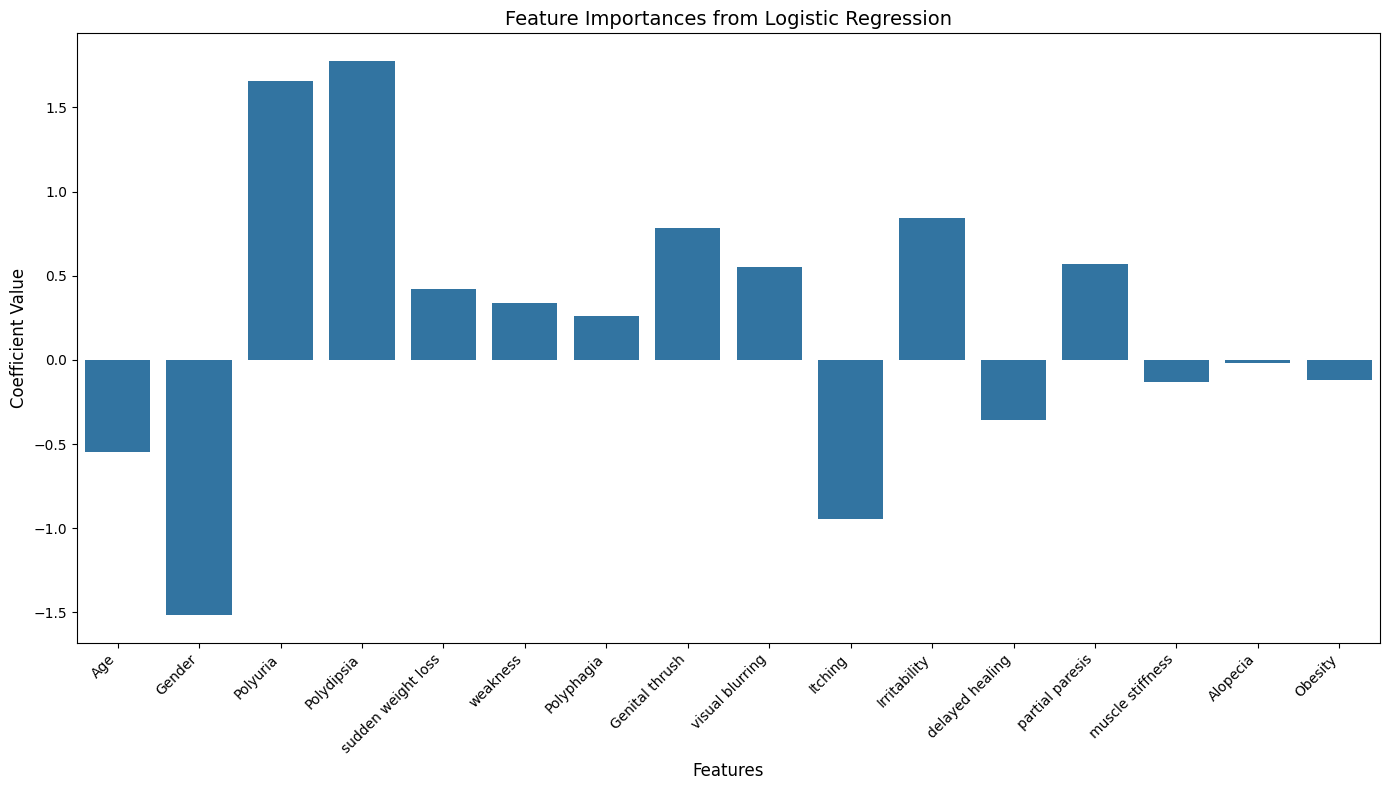

In [342]:
coefficients = model.coef_[0]
features = X.columns
plt.figure(figsize=(14, 8))
sns.barplot(x=features, y=coefficients)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Coefficient Value', fontsize=12)
plt.title('Feature Importances from Logistic Regression', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


Confusion Matrix:
[[28  5]
 [ 3 68]]


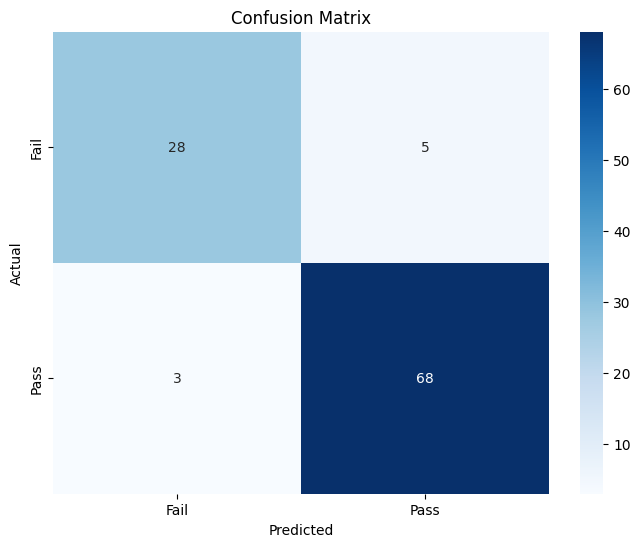

In [343]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

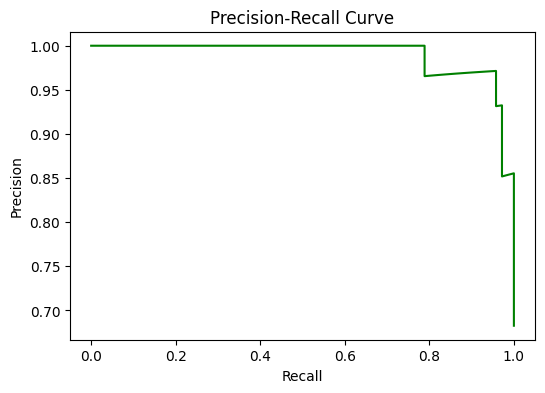

In [344]:
# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

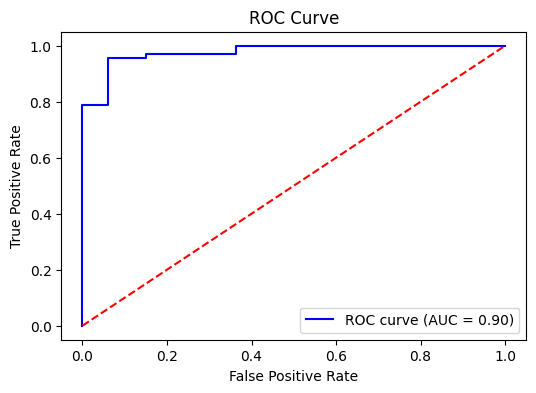

In [345]:
from sklearn.metrics import roc_curve, roc_auc_score
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc_score(y_test, y_pred):.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

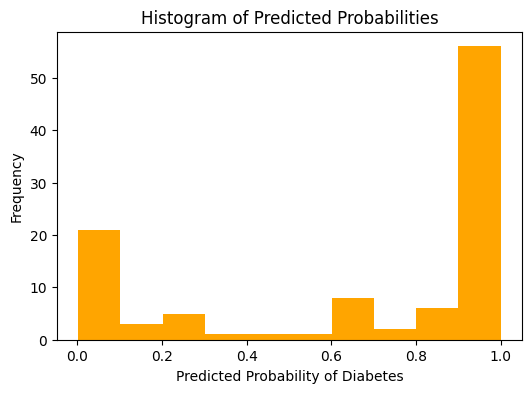

In [346]:
# Histogram of Predicted Probabilities
y_proba = model.predict_proba(X_test_scaled)[:, 1]

plt.figure(figsize=(6, 4))
plt.hist(y_proba, bins=10, color='orange')
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability of Diabetes')
plt.ylabel('Frequency')
plt.show()
